In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from src.ingestion import download_from_drive

In [24]:
df_azionisti = download_from_drive("csv_azionisti")

In [11]:
df_profinanz = download_from_drive("csv_startup_profilo_finanziario")

In [9]:
df_azionisti["Stato giuridico"].value_counts()

Stato giuridico
Attiva                                  11615
In liquidazione                           342
Attiva (con procedure di insolvenza)        9
Cessata (Fusione)                           1
Name: count, dtype: int64

In [14]:
df_profinanz.columns

Index(['Unnamed: 0', 'Ragione sociale', 'BvD ID number',
       'Ricavi delle vendite\nmigl EUR\nUltimo anno disp.',
       'Ricavi delle vendite\nmigl EUR\n2023',
       'Ricavi delle vendite\nmigl EUR\n2022',
       'Ricavi delle vendite\nmigl EUR\n2021',
       'EBITDA\nmigl EUR\nUltimo anno disp.', 'EBITDA\nmigl EUR\n2023',
       'EBITDA\nmigl EUR\n2022', 'EBITDA\nmigl EUR\n2021',
       'Utile Netto\nmigl EUR\nUltimo anno disp.',
       'Utile Netto\nmigl EUR\n2023', 'Utile Netto\nmigl EUR\n2022',
       'Utile Netto\nmigl EUR\n2021',
       'Totale Attività\nmigl EUR\nUltimo anno disp.',
       'Totale Attività\nmigl EUR\n2023', 'Totale Attività\nmigl EUR\n2022',
       'Totale Attività\nmigl EUR\n2021',
       'Patrimonio Netto\nmigl EUR\nUltimo anno disp.',
       'Patrimonio Netto\nmigl EUR\n2023', 'Patrimonio Netto\nmigl EUR\n2022',
       'Patrimonio Netto\nmigl EUR\n2021',
       'Posizione finanziaria netta\nmigl EUR\nUltimo anno disp.',
       'Posizione finanziaria nett

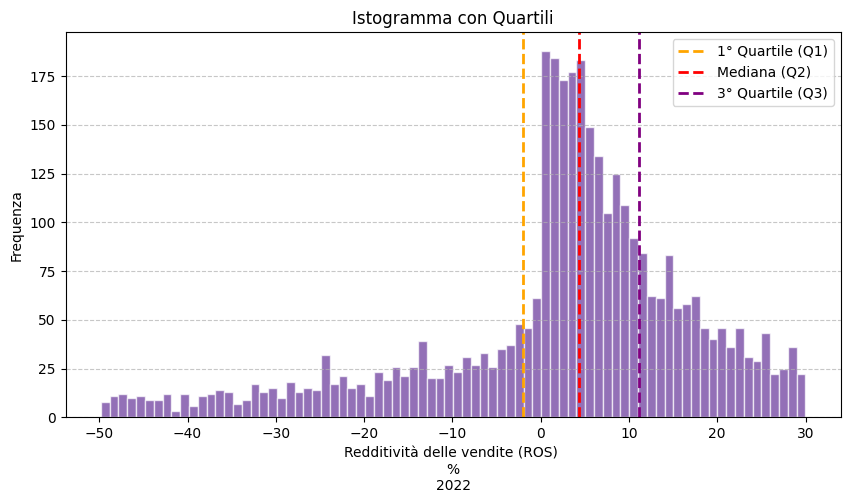

In [23]:
col_name = 'Redditività delle vendite (ROS) \n%\n2022'
bins = 80
data = df_profinanz[col_name]
#eliminare n.s e n.a
data = data.replace("n.s.", np.nan)
data = data.replace("n.d.", np.nan)
data = data.dropna()
#filtra valori numerici
data = data.astype(float)
q1, q2, q3 = np.percentile(data, [25, 50, 75])

# Creare l'istogramma
plt.figure(figsize=(10, 5))
plt.hist(data,
         bins=bins,
         color="rebeccapurple",
         edgecolor="white", alpha=0.7)

# Aggiungere linee per i quartili
plt.axvline(q1, color="orange", linestyle="dashed", linewidth=2, label="1° Quartile (Q1)")
plt.axvline(q2, color="red", linestyle="dashed", linewidth=2, label="Mediana (Q2)")
plt.axvline(q3, color="purple", linestyle="dashed", linewidth=2, label="3° Quartile (Q3)")

# Aggiungere etichette e titolo
plt.xlabel(col_name)
plt.ylabel("Frequenza")
plt.title("Istogramma con Quartili")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrare il grafico
plt.show()